# Homework 1 Week -01

## MLOps Zoomcamp

Link to the [homework](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/01-intro/homework.md)

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19

In [1]:
!ls

data  homework-week-01-intrduction.ipynb


In [25]:
#!mkdir data

In [2]:
%cd data/

/home/ubuntu/MLOps-zoomcamp/homeworks/week-01-introduction/data


In [3]:
!pwd

/home/ubuntu/MLOps-zoomcamp/homeworks/week-01-introduction/data


In [4]:
ls

data/  yellow_tripdata_2022-01.parquet  yellow_tripdata_2022-02.parquet


In [5]:
#!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

In [6]:
#!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

In [7]:
!ls

data  yellow_tripdata_2022-01.parquet  yellow_tripdata_2022-02.parquet


In [8]:
import pandas as pd

In [9]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [10]:
#!pip install pyarrow

In [11]:
df.head().T

,0,1,2,3,4
VendorID,1,1,2,2,2
tpep_pickup_datetime,2022-01-01 00:35:40,2022-01-01 00:33:43,2022-01-01 00:53:21,2022-01-01 00:25:21,2022-01-01 00:36:48
tpep_dropoff_datetime,2022-01-01 00:53:29,2022-01-01 00:42:07,2022-01-01 01:02:19,2022-01-01 00:35:23,2022-01-01 01:14:20
passenger_count,2.0,1.0,1.0,1.0,1.0
trip_distance,3.8,2.1,0.97,1.09,4.3
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,142,236,166,114,68
DOLocationID,236,42,166,68,163
payment_type,1,1,1,2,1


In [12]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [13]:
df.shape

(2463931, 19)

**Q1 Answer**

`19`

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45

In [14]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

We see that there are no missing values in the columns pickup time and dropoff time

In [15]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [16]:
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime','duration']].head()

,tpep_dropoff_datetime,tpep_pickup_datetime,duration
0,2022-01-01 00:53:29,2022-01-01 00:35:40,0 days 00:17:49
1,2022-01-01 00:42:07,2022-01-01 00:33:43,0 days 00:08:24
2,2022-01-01 01:02:19,2022-01-01 00:53:21,0 days 00:08:58
3,2022-01-01 00:35:23,2022-01-01 00:25:21,0 days 00:10:02
4,2022-01-01 01:14:20,2022-01-01 00:36:48,0 days 00:37:32


In [17]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [18]:
df['duration'].head()

0    17.816667
1     8.400000
2     8.966667
3    10.033333
4    37.533333
Name: duration, dtype: float64

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['duration'].describe()

count   2463931.00
mean         14.21
std          46.45
min       -3442.40
25%           6.32
50%          10.18
75%          16.17
max        8513.18
Name: duration, dtype: float64

In [20]:
df['duration'].std()

46.44530513776499

**Q2 Answer**

`46.45`

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-3442.4       , -3442.25414506, -3442.10829013, ...,
         8512.89162346,  8513.0374784 ,  8513.18333333]),
 <BarContainer object of 81969 artists>)

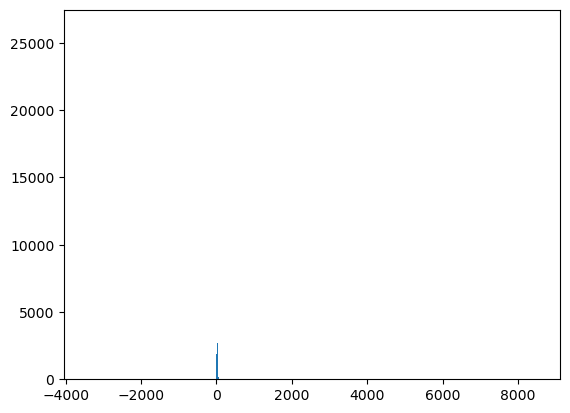

In [24]:
plt.hist(df['duration'], bins='auto')